# CNRR and GPM IMERG/ MSWEP  

This notebook examines compares the high resolution satellite precip datasets GPM IMERG/MSWEP with CNRR, in order to see whether observed precipitation patterns (storms) are captured by the reanalysis (whichi then can be used for further analysis)

# Basic statistics

In [1]:
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import pandas as pd
import iris
import xarray as xr 
import tobac


def read_in_netcdf(file, param):
    dataset = Dataset(file)    
    precip= np.array(dataset[str(param)])
    dataset.close()
    return precip

## Histogram 

In [21]:
#  plot histogram based on bins and heights (output from np.histogram)

def plot_histograms(heights,heights2, bins, bins2): 
    a= np.sum(heights)
    b= np.sum(heights2)
    
    plt.style.use('seaborn')
    plt.rcParams.update({'font.size': 35,
                 'xtick.labelsize' : 35,
                 'ytick.labelsize' : 35})
    plt.figure(figsize=(20, 17))

    plt.subplot(2,2,1)
    plt.title('GPM', fontsize= '30')
    plt.bar(bins[:-1], (heights/a)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    #thresholds
    plt.axvline(x=1, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=2, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=3, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=4, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=5, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=7, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=10, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=15, ymin=0, ymax=50,linestyle= '--', color= 'k')

    
    plt.subplot(2,2,2)
    plt.title('CNRR', fontsize= '30')
    plt.bar(bins2[:-1], (heights2/b)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    #thresholds
    plt.axvline(x=1, ymin=0, ymax=50,linestyle=  '--', color= 'k')
    plt.axvline(x=2, ymin=0, ymax=50, linestyle= '--', color= 'k')
    plt.axvline(x=3, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=4, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=5, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=7, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=10, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=15, ymin=0, ymax=50,linestyle= '--', color= 'k')
    
    plt.savefig('/media/juli/Elements/comparison/histogram_gpm_cnrr_withthresholds.pdf')

In [7]:
file_list= glob.glob('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/high_resolution/3B-HHR*.nc4')  

In [8]:
# GPM, calculate occurrences 
nbins = 100
heights = np.zeros((nbins,))
i = 0 
for file in file_list:
    precip= read_in_netcdf(file, param='precipitationCal')
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins = b
    heights += h
    i += 1
    if i % 10000 == 0:
        print(i)
    

10000
20000
30000
40000
50000
60000
70000


In [9]:
file_list_cnrr= glob.glob('/media/juli/Data/third_pole/CNRR/data/2014_2016/cnrr*.nc4')  

In [10]:
# CNRR, calculate occurrences
nbins = 100
heights2 = np.zeros((nbins,))
i = 0 
for file in file_list_cnrr:
    precip= read_in_netcdf(file, param='prcp')
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins2 = b
    heights2 += h
    i += 1
    if i % 10000 == 0:
        print(i)
    

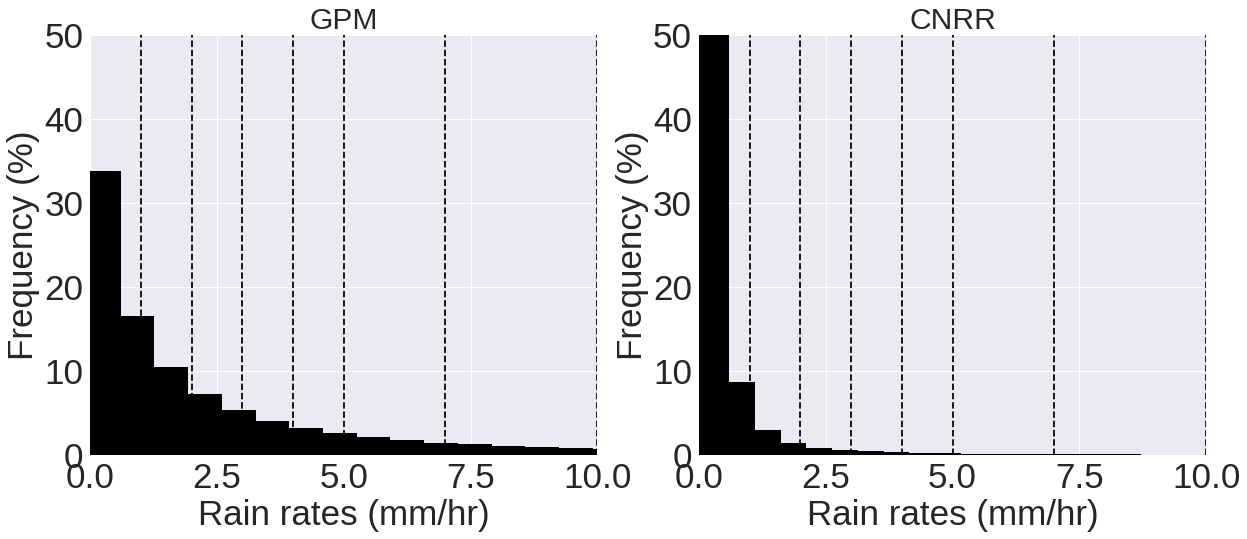

In [22]:
# plot histograms
plot_histograms(heights, heights2,bins, bins2)

## Summer mean precip 

## Extreme precip 

# Cloud tracking (tobac)

- are the longest storms captured in both datasets? 

- look at general storm statistics (area,neireast neighbor, intensity, etc) and spatial distribution 

- concentrate on the elevations > 3000 m ASL 

In [2]:
import tobac
import glob
data_file = '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201507_tobac_input.nc4'
Precip=iris.load_cube(data_file,'precipitationCal')
dxy,dt=tobac.get_spacings(Precip)

Available coordinates:     ['time', 'longitude', 'latitude']


In [3]:
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file = savedir+ '/Features_merged_witharea.h5'
#file= savedir +'/Features_Precip.h5'
Features = pd.read_hdf(file, 'table')

# Calculate area for all Feature chunks 

In [8]:
import glob 
import os
file_list= glob.glob(savedir  + '/Features_Precip??????.h5')  
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'
file_list.sort()

In [ ]:
for file in file_list[14::]:
    # read in features 
    Features = pd.read_hdf(file, 'table')
    date= file[len(file)-9 : len(file)- 3]

    # read in data mask 
    f = savedir+ '/Mask_Segmentation_precip'+str(date)+ '.nc'
    mask = iris.load_cube(f, 'segmentation_mask')  
    
    # read in corresponding precip file 
    #f = gpm_dir + 'gpm_imerg_'+ date + '_tobac_input.nc4'
    #precip = iris.load_cube(f, 'precipitationCal')
    
    Features_area= tobac.analysis.calculate_area(Features, mask)
    Features_area.to_hdf(os.path.join(savedir,'Features_area'+date+'.h5'),'table')
    print('....area for', file, 'calculated and saved.')    

/home/juli/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [128]:
Features = tobac.analysis.calculate_area(Features_Precip, Mask)

/home/juli/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [131]:
Features.to_hdf(os.path.join(savedir,'Features_merged_witharea.h5'),'table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [148]:
hist=  tobac.analysis.area_histogram(Features,Mask, bin_edges= np.linspace(np.min(areas), np.max(areas), 30))

In [170]:
170*170*1000000

28900000000

In [177]:
areas= Features.area.values
Features['area']/= 1000000

In [189]:
hist= tobac.analysis.area_histogram(Features, Mask, bin_edges= np.linspace(np.min(areas), np.max(areas),15))


In [191]:
hist[0]

array([31160,  3359,   835,   281,   125,    44,    18,    11,     6,
           1,     3,     0,     0,     1])

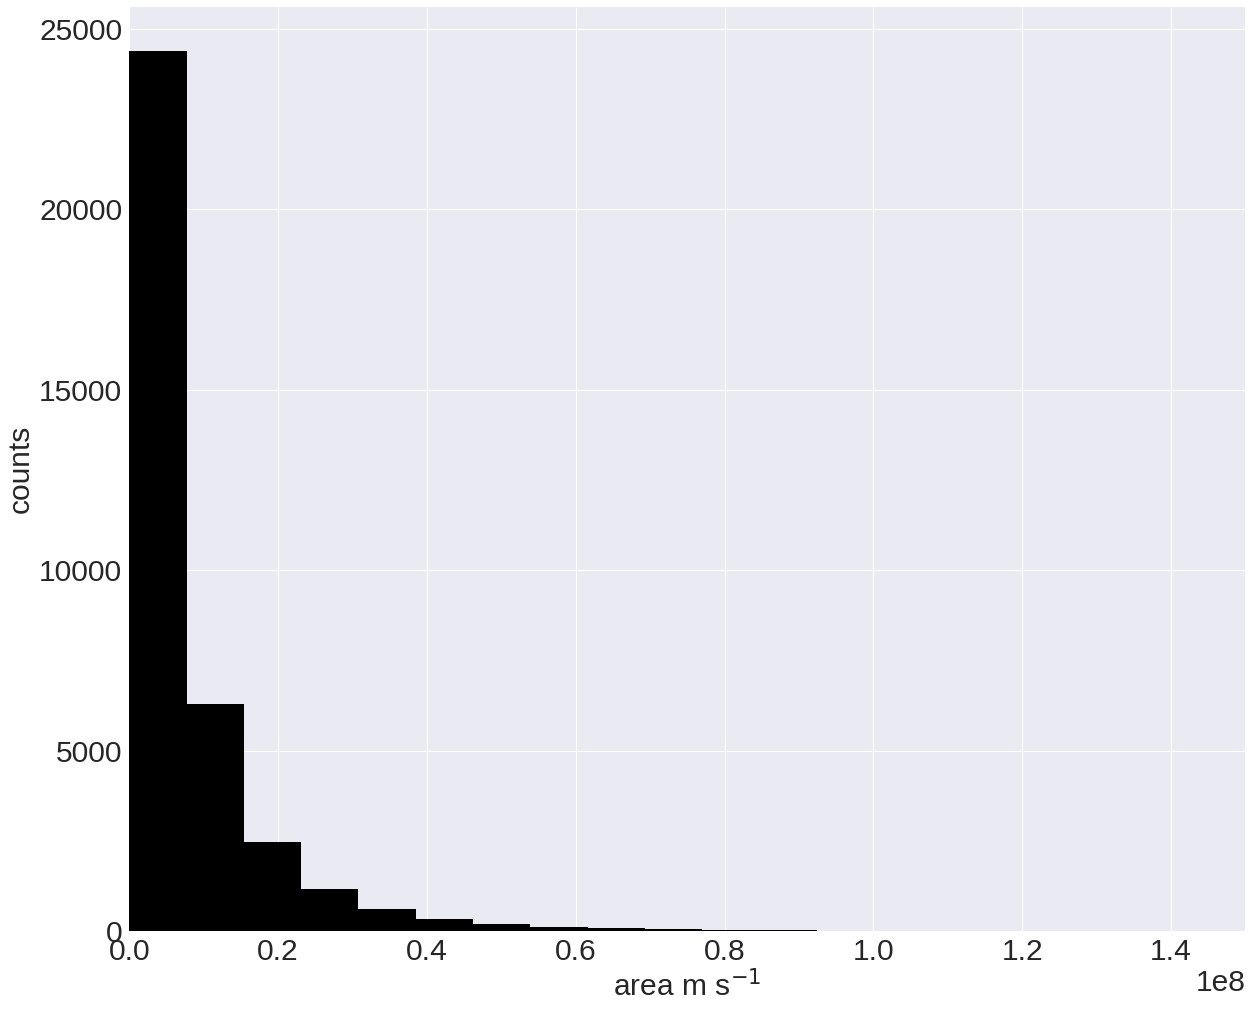

In [202]:
heights = hist[0]
bins = hist[1]

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

#plt.subplot(2,2,1)
#plt.bar(bins[:-1], hist[0], width = 10, color='k')
plt.ylabel('counts', fontsize= 30)
plt.xlabel('area m s$^{-1}$', fontsize= 30)
plt.hist(areas, bins = 30, color ='k')
plt.xlim(0,150000000)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_area_GPM.png')

## How much of the total precipitation can be captured by tobac tracking on the datasets? 

- calculate total precip in mask segments compared to total precip in input files!


In [9]:
import glob
# masks
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file_list= glob.glob(savedir  + '/Mask_Segmentation_precip??????.nc')  

# precip data 
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'

# read in tracking table 
file = savedir + '/Tracks_GPM_2014-2017.h5'
#file = savedir + '/Tracks_GPM_2014-2017_1.5h.h5'
Tracks= pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')


# dataframe to store total and system-related precip each month 
contributions = pd.DataFrame(columns=['date', 'total_precip','precip_1mm', 'prec_5mm',  'features_precip','tracked_precip', 'contr%'])




In [91]:
date = '201408'
yearmonth= '2014-08'
file= '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201408.nc'

In [106]:
def calculate_contributions(f, Tracks, gpm_dir, contributions):
    from netCDF4 import Dataset
    
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]

    # read in data mask 
    ds = Dataset(f)
    mask = np.array(ds['segmentation_mask'])  
    lats = np.array(ds['lat'])
    lons = np.array(ds['lon'])

    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]
    
    
    # read in corresponding precip file 
    file = gpm_dir + 'gpm_imerg_'+ date + '_tobac_input.nc4'
    ds_precip= Dataset(file)
    precip = np.array(ds_precip['precipitationCal'])
    precip[precip < 0.0 ] = 0 
    ds_precip.close()


    # update mask 
    for frame, values in enumerate(mask):
        frame_idx = frame + feat_select['frame'].values[0]
        timeframe= mask[frame, :, :] # example timestep 
        frame_select =feat_select.loc[feat_select['frame'] == frame_idx]  # all tracked features in this time frame 

        # test if segments in example also are linked features: 
        features = np.unique(timeframe[timeframe > 0])
        tracked_features = frame_select['feature'].values
        for f in features:
            if f not in tracked_features:
                mask[frame, :, :][timeframe == f]= 0 
                

    # calculate contribution
    prec= 0
    total_precip = 0 
    features_precip= 0 
    prec_1mm =0 
    prec_5mm = 0 
    mask_segments = np.array(ds['segmentation_mask'])  
    ds.close()
    for frame, values in enumerate(mask): 
        timestamp= precip[frame, :, :]
        total_precip += np.nansum(timestamp)
        prec_1mm += np.nansum(timestamp[timestamp >= 1]) 
        
        #timestamp[timestamp < 5]= 0 
        prec += np.nansum(timestamp[values > 0])
        prec_5mm += np.nansum(timestamp[timestamp >=5 ])   
        mask_segment = mask_segments[frame,:,:]
        timestamp[timestamp < 5] = 0 
        features_precip += np.nansum(timestamp[mask_segment > 0 ])

    
    # add values to dataframe 
    contr = (prec/total_precip)*100
    #print('contribution of trajectory cells to total precip: '  ,  contr)
    if prec == 0:
        print('........but only contributions through non-linked precip features', file)
        contr= (features_precip/total_precip)*100
    
    data = [str(date), float(total_precip),float(prec_1mm), float(prec_5mm), float(features_precip), float(prec), float(contr)]
    contributions.loc[len(contributions)]= data
    print('contributions updated.')
    
    # save masked precipitation data (precip values of all trajectory cells)
    precip_cells = timestamp[mask_segments[frame,:,:] > 0 ]
    new_precip= xr.DataArray(precip_cells)
    new_precip.to_netcdf(path=savedir + '/Precip_cells' + str(date) + '.nc')
    print('netcdf file saved.')
    
    return contributions 



In [44]:
file= gpm_dir + 'gpm_imerg_201506_tobac_input.nc4'
ds_precip= Dataset(file)
precip = np.array(ds_precip['precipitationCal'])

In [107]:
##########  for all chunks ############################################

for f in file_list:
    print('calculating precip contributions for...', f)
    contributions_extreme = calculate_contributions(f, Tracks, gpm_dir, contributions)


calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201408.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201510.nc
........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201510_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201612.nc
........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201612_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/

........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201606_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201607.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201608.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201609.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201610.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/El

In [30]:
# save dataframe to HDF5 file 
import os 
contributions.to_hdf(os.path.join(savedir,'precipitation_features_1.5htracks.h5'),'table')


In [14]:
# read in table with contributions 
file = savedir + '/precipitation_features_extreme.h5'
contributions= pd.read_hdf(file, 'table')

In [30]:
feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == '201510']
contributions_old = contributions

In [111]:
tracked_precip= contributions.tracked_precip.values
contr= contributions['contr%'].values
total_precip= contributions.total_precip.values
features_precip= contributions.features_precip.values
precip_1mm =contributions.precip_1mm.values
prec_5mm= contributions.prec_5mm.values

In [112]:
contr_tracked = np.sum(tracked_precip)/np.sum(total_precip)
contr_features = np.sum(features_precip)/np.sum(prec_5mm)
print(contr_features*100, contr_tracked*100)

93.94961454309522 23.57057018993462


In [108]:
contributions

,date,total_precip,precip_1mm,prec_5mm,features_precip,tracked_precip,contr%
0,201408,9.673146e+06,7.922660e+06,3.125914e+06,2.956294e+06,4.232416e+06,43.754283
1,201510,2.502382e+06,1.841112e+06,5.240124e+05,4.907107e+05,0.000000e+00,19.609745
2,201612,9.108966e+05,6.748861e+05,2.771833e+05,2.521529e+05,0.000000e+00,27.681839
3,201805,4.799898e+06,3.645926e+06,1.221149e+06,1.122168e+06,0.000000e+00,23.378993
4,201403,1.859103e+06,1.433280e+06,5.890835e+05,5.516997e+05,0.000000e+00,29.675587
5,201404,2.778251e+06,1.970837e+06,6.032134e+05,5.462701e+05,0.000000e+00,19.662373
6,201405,4.082728e+06,3.021349e+06,1.063393e+06,9.819641e+05,1.099825e+06,26.938486
7,201406,7.457654e+06,5.781833e+06,2.234537e+06,2.106073e+06,2.690543e+06,36.077601
8,201407,9.738614e+06,7.668909e+06,2.868018e+06,2.719079e+06,3.942550e+06,40.483684
9,201409,7.319612e+06,5.990379e+06,2.687983e+06,2.590560e+06,2.851826e+06,38.961445


# How much of the precipitation above 1mm? 

- difference between features_precip and precip_1mm not so large, which means that feature detection captures the largest part of precipitation (rather than that precipitation rates are dominant by a lot of very small rain rates)
- however, the tracked precipitation segments which according to this tracking belong to the MCS, explain only a small part of total and small part of precipitation above 1mm 
- this suggests that most rain rates do not prevail very long time (under 3 hours) 
- how do the results look like for other tracking thresholds? 
- how much of the extreme precipitation is explained by the systems? 

- in general: spatial organization seems to play a role but the temporal persistence is unclear or not so long

In [104]:
contr_tracked = np.nansum(tracked_precip)/np.nansum(precip_1mm)
contr_features = np.nansum(features_precip)/np.nansum(precip_1mm)
print(contr_features*100, contr_tracked*100)

83.60588622754926 30.474147115559962


In [301]:
contributions['date']=pd.to_datetime(contributions['date'],format='%Y%m')

In [8]:
months= []
for i in contributions.date:
    months.append(i.month)


NameError: name 'contributions' is not defined

In [7]:
contributions['month']= months


NameError: name 'months' is not defined

In [316]:
means = contributions.groupby('month').mean()


tracked_precip= means.tracked_precip.values
total_precip= means.total_precip.values
features_precip= means.features_precip.values
precip_1mm =means.precip_1mm.values


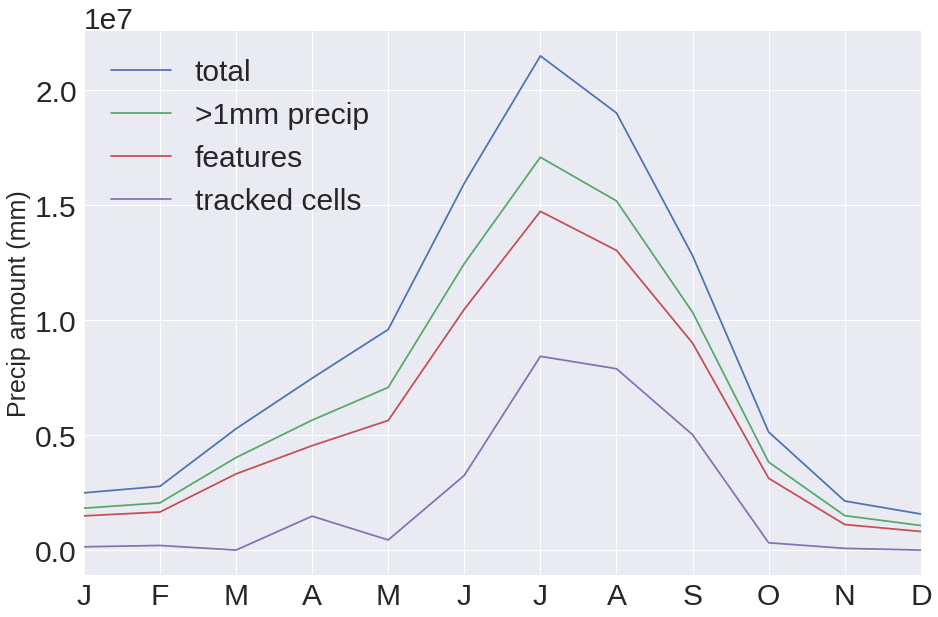

In [362]:


plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(15,10 ))



plt.plot(total_precip/0.5, label= 'total')
plt.plot(precip_1mm/0.5, label = '>1mm precip')

plt.plot(features_precip/0.5, label= 'features')
plt.plot(tracked_precip/0.5, label= 'tracked cells')


#plt.plot(total_precip/np.sum(total_precip), label= 'total')
#plt.plot(features_precip/np.sum(features_precip), label= 'features')
#plt.plot(tracked_precip/np.sum(tracked_precip), label= 'tracked cells')
#plt.plot(precip_1mm/np.sum(precip_1mm), label = 'total $>$ 1mm')


labels= ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(np.arange(0,12,1), labels)

plt.xlim(0,11)
plt.legend(fontsize= 'medium')
plt.ylabel('Precip amount (mm)', fontsize= '25')

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/precip_contributions_gpm.png')

## CONTRIBUTIONS GPM : 
 
- tracked/total: 39.31132502446548 features/total: 58.871410694448514 
- tracked/1mm: 56.426721301728435 features/1mm: 84.50289278796473 
- tracked/5mm: 71.87710038043252 features/5mm: 95.16371289033626

 
## CONTRIBUTIONS CNRR: 

- tracked/total: 29.81430493974125  features/total: 58.25924417373488 
- tracked/1mm: 39.523129739564915 features/1mm: 77.23096918279185 
- tracked/5mm: 49.71470393700792 features/5mm: 89.65732347246939

 



- with looser time threshold: tracked and features much closer for tracked --> this indicates that the temporal continuity is the major point here and not the area contiguity! 
- since spatial contiguous pixels can explain most of the precip, the question is how large the areas are. How much of areas comparable to MCS can we find? area distribution? 

# How big are the precip features? 

In [7]:
2.305635e+12/1000000000

2305.635

In [25]:
Features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,latitude,ncells,area
0,0,13,93.632338,155.305724,15,1,1,2015-07-01 00:00:00,2015-07-01 00:00:00,79.413231,42.480573,17,2305.634518
1,0,31,187.947964,116.728292,22,1,2,2015-07-01 00:00:00,2015-07-01 00:00:00,88.844795,38.622830,15,2152.036765
2,0,35,198.827297,56.045114,11,1,3,2015-07-01 00:00:00,2015-07-01 00:00:00,89.932727,32.554511,8,1239.286795
3,0,40,207.371155,78.420016,23,1,4,2015-07-01 00:00:00,2015-07-01 00:00:00,90.787115,34.792001,12,1813.059652
4,0,43,233.972764,104.526130,27,1,5,2015-07-01 00:00:00,2015-07-01 00:00:00,93.447273,37.402613,28,4088.063426
5,0,54,270.718346,92.831050,25,1,6,2015-07-01 00:00:00,2015-07-01 00:00:00,97.121837,36.233105,26,3854.867877
6,0,7,91.859691,26.699087,30,2,7,2015-07-01 00:00:00,2015-07-01 00:00:00,79.235969,29.619908,46,7355.177542
7,0,8,93.725910,33.947079,19,2,8,2015-07-01 00:00:00,2015-07-01 00:00:00,79.422588,30.344708,70,11119.840836
8,0,12,139.622248,15.593956,13,2,9,2015-07-01 00:00:00,2015-07-01 00:00:00,84.012226,28.509395,10,1614.747513
9,0,24,202.036922,0.947423,15,2,10,2015-07-01 00:00:00,2015-07-01 00:00:00,90.253692,27.044742,25,4088.513174


In [24]:
Features['area']/= 1000000000

# Comparison environmental impact 

In [140]:
# import tracks for CNRR 
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/Tracks_CNRR_2006-2016_storms.h5'
Tracks_cnrr = pd.read_hdf(file, 'table')
Tracks_cnrr['timestr']=pd.to_datetime(Tracks_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

In [141]:
# import tracks for GPM 
savedir='/media/juli/Data/third_pole/satellite_data/gpm_v06/Save'
file = savedir + '/Tracks_GPM_2006_2016_storms.h5'
Tracks_gpm = pd.read_hdf(file, 'table')
Tracks_gpm['timestr']=pd.to_datetime(Tracks_gpm['timestr'],format='%Y-%m-%d %H:%M:%S')


In [155]:
a= Tracks_cnrr.timestr.values[0]


In [165]:
b= Tracks_gpm.timestr.values[4]

- total trajectories GPM: 81809 (337409 linked features)
- total trajectories CNRR: 63798 (806576 linked features)


In [4]:
t= [1,2,3,4,5,7,10,15]
t= np.array(t)

In [6]:
gpm= np.array(())
for t in np.unique(Tracks_cnrr.threshold_value):
    gpm = np.append(gpm, np.shape(Tracks_cnrr[Tracks_cnrr.threshold_value == t])[0] / np.shape(Tracks_cnrr)[0]*100)

In [7]:
cnrr= np.array(())
for t in np.unique(Tracks_gpm.threshold_value):
    cnrr = np.append(cnrr, np.shape(Tracks_gpm[Tracks_gpm.threshold_value == t])[0] / np.shape(Tracks_gpm)[0]*100)

(9,)

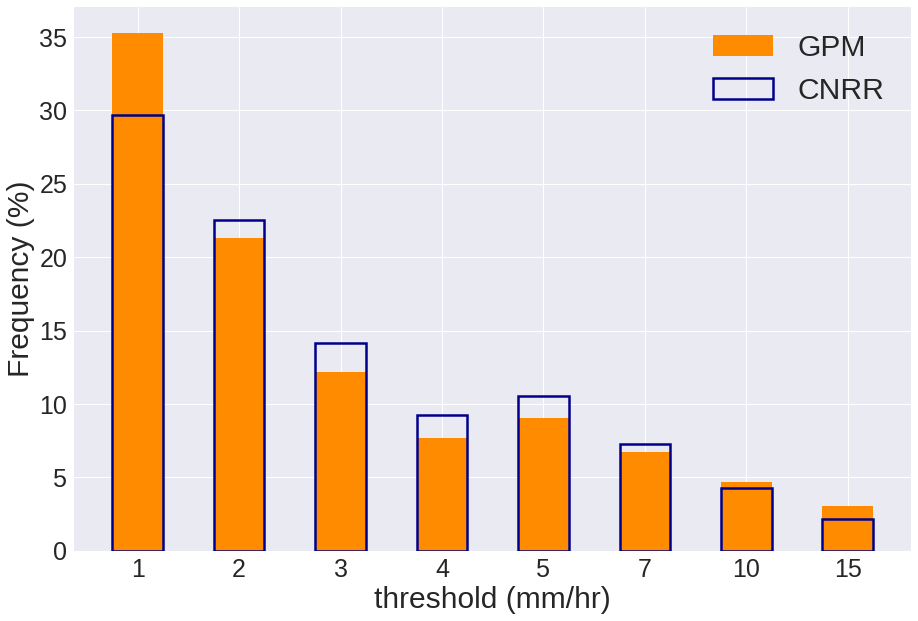

In [15]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = np.arange(8)
plt.bar(xaxis, gpm, width=0.5, color='darkorange', label='GPM')
plt.bar(xaxis, cnrr, width = 0.5, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR')

ax_lifetime.set_xlabel('threshold (mm/hr)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
labels = ['1', '2', '3', '4', '5', '7', '10', '15']
plt.xticks(xaxis, labels)
plt.legend(fontsize= 30)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/threshold_freq_CNRR_GPM_2006_2016.png')

## Lifetime

In [153]:
hist_gpm, bin_edges, bin_centers = tobac.lifetime_histogram(Tracks_gpm,bin_edges=timesteps,density=True)
hist_cnrr, bin_edges, bin_centers= tobac.lifetime_histogram(Tracks_cnrr,bin_edges=timesteps,density=True)

In [147]:
timesteps = np.arange(180,20*60,60)

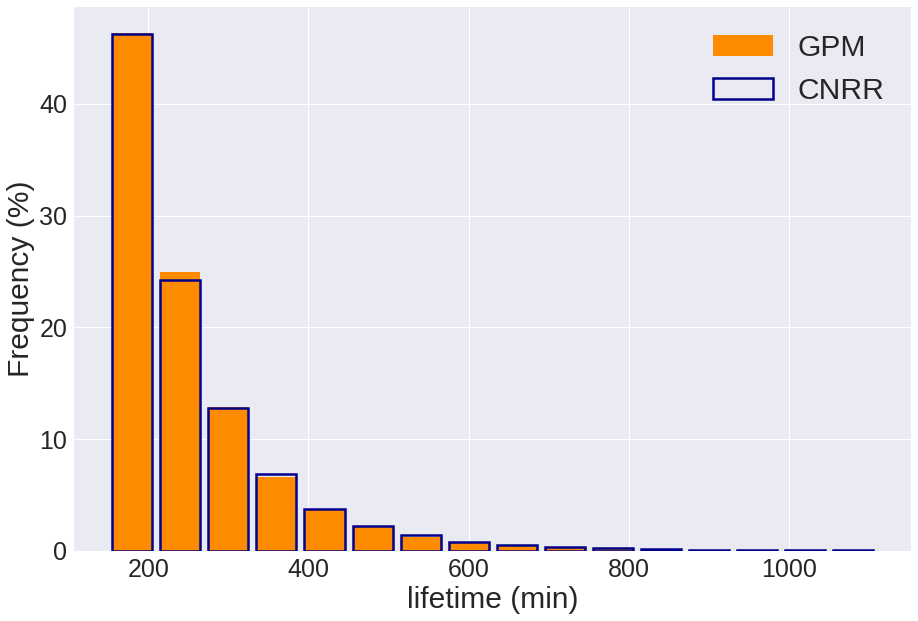

In [160]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

#tobac.plot_lifetime_histogram_bar(Tracks_gpm,axes=ax_lifetime,bin_edges=timesteps,density=True,width_bar=50, color='darkorange', label='GPM')
#tobac.plot_lifetime_histogram_bar(Tracks_cnrr,axes=ax_lifetime,bin_edges=timesteps,density=True,width_bar=50, edgecolor='darkblue', color= 'None', linewidth= 2.5,  label='CNRR')


heights_gpm = hist_gpm/ np.sum(hist_gpm)
heights_cnrr = hist_cnrr/ np.sum(hist_cnrr)

plt.bar(timesteps[:-1], heights_gpm*100, width=50, color='darkorange', label='GPM')
plt.bar(timesteps[:-1], heights_cnrr*100, width = 50, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR')

ax_lifetime.set_xlabel('lifetime (min)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 30)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/lifetime_CNRR_GPM_2006_2016.png')

#  -> very similar lifetimes for GPM and CNRR 2006 - 2016 ! 

In [12]:
durations= []
cells = []
for c in np.unique(Tracks.cell):
    duration= (np.shape(Tracks.loc[Tracks.cell == c ])[0])* 0.5
    if duration > 6:
        durations.append(duration)
        cells.append(c)

In [19]:
durations= np.array(durations)
durations = np.flip(np.sort(durations), axis =0 )
strongest = durations[0:500]

cells = np.flip(np.sort(cells), axis =0 )
strongest_cells = cells[0:500]


In [20]:
i = 0 
for c in strongest_cells:
    if i == 0:
        df= Tracks.loc[Tracks.cell == c ]
        i+=1 
    else:
        df= df.append(Tracks.loc[Tracks.cell == c ])

In [21]:
subset= df
df.shape

(8190, 14)

In [22]:
import tobac
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

shpfilename= '/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
#reader = shpreader.Reader(shpfilename)

shape_feature = ShapelyFeature(Reader(shpfilename).geometries(),
                                ccrs.PlateCarree(),facecolor='none', edgecolor='black' , linewidth = 2.0)

- the 100 longest storms have lifetimes ranging from 14 to 23.5 hours and originate mostly within the southeast of the TP
- when more lifetimes are included (e.g. the longest 500 from 10 to 23.5 hours), more storms are generated outside of the 3000 boundary 

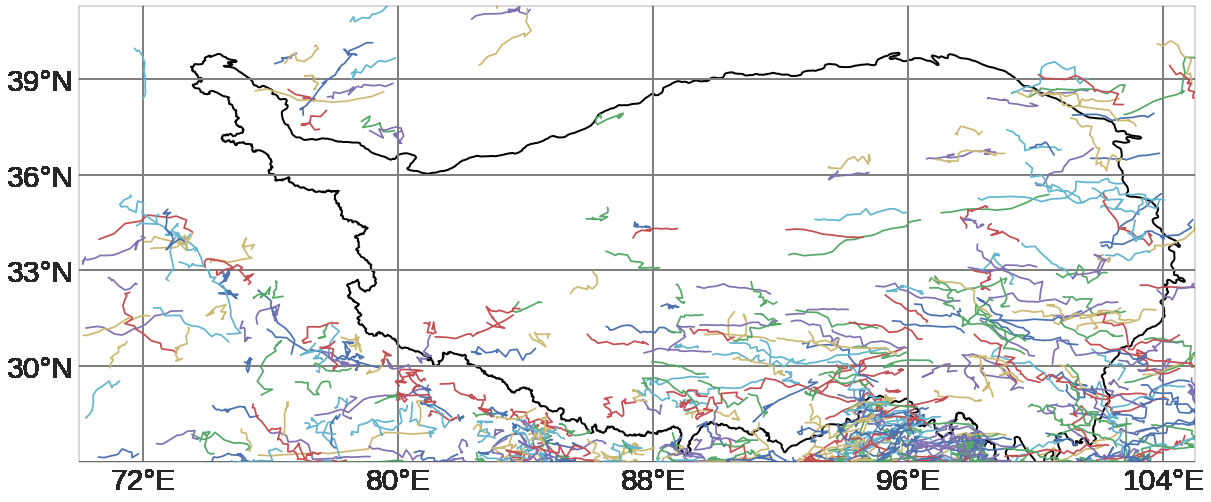

In [24]:
axis_extent= [70, 105, 27.0, 40 ]

# Plot map with all individual tracks:
import tobac
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(subset,axis_extent=axis_extent,axes=ax_map)

# Plot TP boundary polyline from shapefile 
ax_map.add_feature(shape_feature)
plt.ylabel('Lat', fontsize= '25')
plt.xlabel('Lon', fontsize= '25')

plt.savefig('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Plot/tracks_TP_gpm_longest_500_storms_2014_2016.png')

In [198]:
thresholds= Tracks.threshold_value.values
heights, bins = np.histogram(thresholds)

In [207]:
vals= np.unique(Tracks.threshold_value.values)

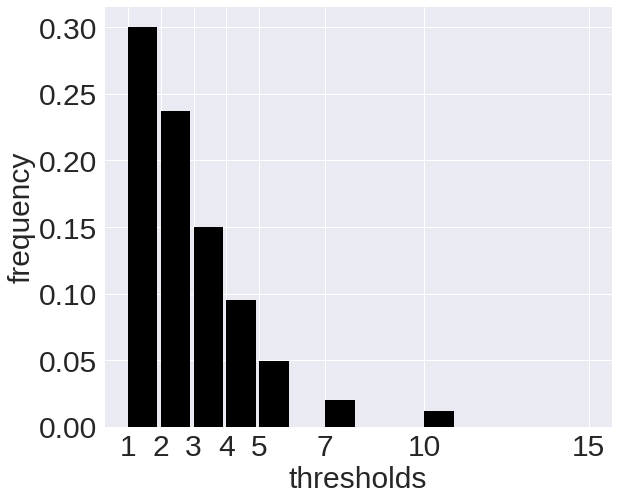

In [213]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

plt.subplot(2,2,1)
plt.hist(thresholds, bins = vals, width = 0.9, color='k', density= True)
plt.ylabel('frequency', fontsize= 30)
plt.xlabel('thresholds', fontsize= 30)
plt.xticks(vals)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_thresholds.png')

In [217]:
subset.shape

(8077, 14)

In [227]:
count = 0 
for c in np.unique(subset.cell):
    d = subset.loc[subset.cell == c ]
    t= np.unique(d.threshold_value)
    if 5 in t:
        count +=1 

only 317 of 8077 storms contain rain rates > 5mm! 

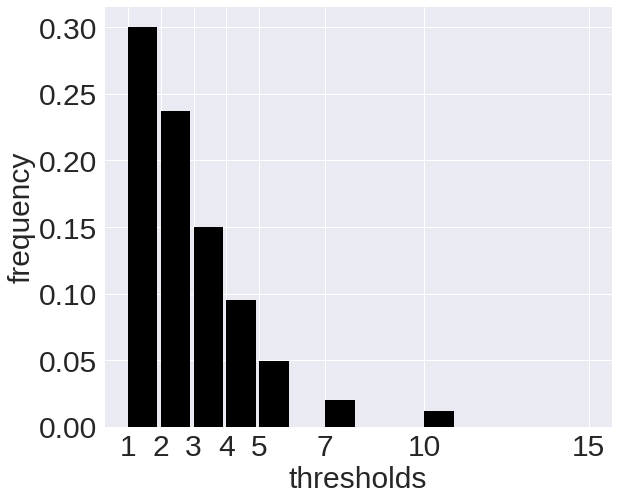

In [222]:
vals= np.unique(subset.threshold_value.values)
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

plt.subplot(2,2,1)
plt.hist(thresholds, bins = vals, width = 0.9, color='k', density= True)
plt.ylabel('frequency', fontsize= 30)
plt.xlabel('thresholds', fontsize= 30)
plt.xticks(vals)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_thresholds_longest100.png')


# nearest neighbor

In [1]:
import pandas as pd
savedir = '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file= savedir + '/Features_cnrr_merged_nn.h5'
Features = pd.read_hdf(file, 'table')
Features['min_distance'] /= 1000

In [2]:
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file= savedir + '/Features_merged_nn.h5'
Features_gpm = pd.read_hdf(file, 'table')
Features_gpm['min_distance'] /= 1000

In [5]:
heights, bins= tobac.nearestneighbordistance_histogram(Features.loc[Features.threshold_value == 1], bin_edges = np.linspace(0,2000,100))
heights10, bins10= tobac.nearestneighbordistance_histogram(Features.loc[Features.threshold_value >= 10], bin_edges = np.linspace(0,2000,100))


heights_gpm, bins_gpm= tobac.nearestneighbordistance_histogram(Features_gpm.loc[Features_gpm.threshold_value == 1], bin_edges = np.linspace(0,2000,100))
heights10_gpm, bins10_gpm= tobac.nearestneighbordistance_histogram(Features_gpm.loc[Features_gpm.threshold_value >= 10], bin_edges = np.linspace(0,2000,100))




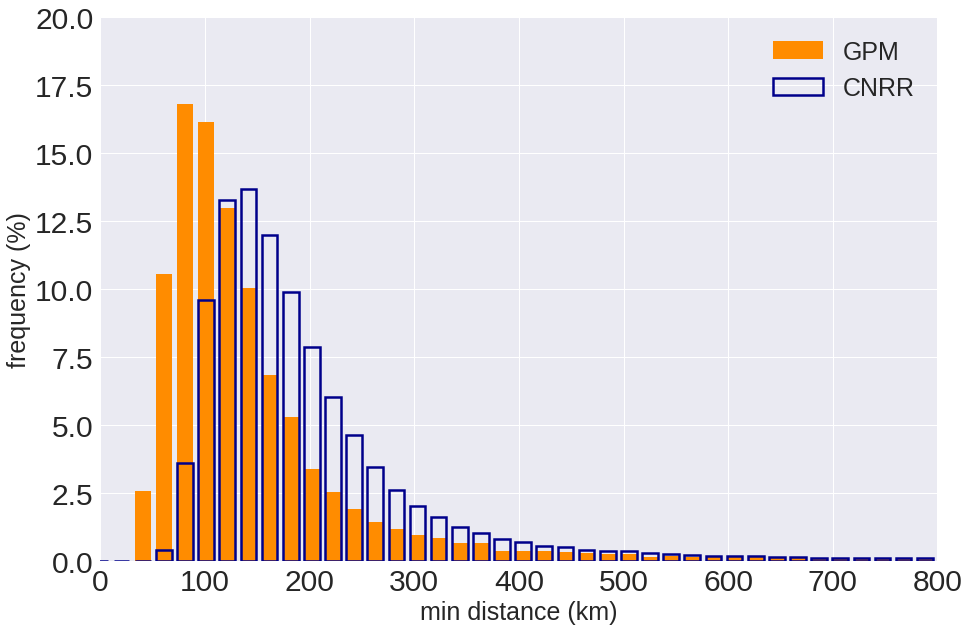

In [6]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,'ytick.labelsize' : 30})
plt.figure(figsize=(15, 10))

height = heights/np.sum(heights)
height10 = heights10/np.sum(heights10)

height_gpm = heights_gpm/np.sum(heights_gpm)
height10_gpm = heights10_gpm/np.sum(heights10_gpm)

#plt.subplot(2,2,1)


#plt.bar(bins_gpm[:-1], height_gpm*100, width = 15, color='darkorange', label= '1mm/hr')
plt.bar(bins10_gpm[:-1], height10_gpm*100, width = 15, color='darkorange',linewidth= 2.5, label= 'GPM')

#plt.bar(bins[:-1], height*100, width = 15, edgecolor='darkblue', color= 'None', label= '1mm/hr')
plt.bar(bins10[:-1], height10*100, width = 15, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR')



plt.ylim(0,20)
plt.xlim(0,800)
plt.xlabel('min distance (km)', fontsize= 25)
plt.ylabel('frequency (%)', fontsize = 25)
plt.legend(fontsize= 25)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/histogram_nn_cnrr_gpm_threshold.png')

## Basic statistics

In [ ]:
# look at frequencies of tracked systems based on different thresholds 
for t in parameters_features['threshold']:
    subselect= Track.loc[Track['threshold_value'] == t]
    print(t, subselect.shape[0])

In [ ]:
from tobac.analysis import lifetime_histogram

def plot_lifetime_histogram(track,bin_edges=np.arange(0,200,20),density=False,**kwargs):
    hist, bin_edges,bin_centers = lifetime_histogram(track,bin_edges=bin_edges,density=density)
    plot_hist=plt.plot(bin_centers, hist,**kwargs)
    return plot_hist

def plot_lifetime_histogram_bar(track,axes=None,bin_edges=np.arange(0,100,20),density=False,width_bar=10,shift=0.5,**kwargs):
    hist, bin_edges, bin_centers = lifetime_histogram(track,bin_edges=bin_edges,density=density)
    plot_hist=plt.bar(bin_centers+shift,hist,width=width_bar,**kwargs)
    return plot_hist

def plot_histogram_cellwise(track,bin_edges,variable,quantity,axes=None,density=False,**kwargs):
    hist, bin_edges,bin_centers = histogram_cellwise(track,bin_edges=bin_edges,variable=variable,quantity=quantity,density=density)
    plot_hist=axes.plot(bin_centers, hist,**kwargs)
    return plot_hist

def plot_histogram_featurewise(Track,bin_edges,variable,axes=None,density=False,**kwargs):
    hist, bin_edges, bin_centers = histogram_featurewise(Track,bin_edges=bin_edges,variable=variable,density=density)
    plot_hist=axes.plot(bin_centers, hist,**kwargs)
    return plot_hist


In [ ]:
for t in parameters_features['threshold']:
    # look at  frequencies of tracked systems based on different thresholds 
    subselect= Track.loc[Track['threshold_value'] == t]
    print(t, subselect.shape[0])
    plt.clf()
    
    fig_lifetime,ax_lifetime=plt.subplots()
    tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
    ax_lifetime.set_xlabel('lifetime (min)')
    ax_lifetime.set_ylabel('counts')
    plt.show()
    plt.savefig('Plot/lifetime_histogram_threshold_' + str(t) + '.png')
 

## Track stats

In [4]:
# import tracks for GPM 
savedir='/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
#file = savedir + '/Tracks_GPM_2014_2017_updatedframes.h5'
file = savedir + '/Tracks_GPM_2014-2017_v_precip.h5'
Tracks = pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')

In [10]:
## This function calculates statistics for each tracked precipitation cell.
# Input: Tracks 
# Returns: pandas dataframe with saved statistics for each tracked cell 

def system_stats(Tracks):
    # dataframe to store system stats 
    mcs = pd.DataFrame(columns=['cell_id','init_time', 'total_precip','mean_rr', 'max_rr', 'lifetime', 'v' , 'max_area', 'mean_area','total_area'])

    for idx, cell in Tracks.groupby('cell'):
        # compute statistics 
        cell_id = cell.cell.values[0]
        init_time = cell.time.values[0]
        total_precip = np.nansum(cell.precip.values)*0.5
        v= np.nanmean(cell.v.values)
        #mean_rr = np.nanmean(cell.mean_rr.values)
        #max_rr= np.nanmax(cell.max_rr.values)
        #lifetime = np.shape(cell)[0]*0.5
        #mean_area = np.nanmean(cell.area.values)
        #max_area = np.nanmax(cell.area.values)
        #total_area = np.nansum(cell.total_area) 

        mean_area = 999
        max_area = 999
        total_area = 999
        mean_rr = 999
        max_rr=999
        lifetime = 999

        # add to dataframe 
        data = [str(cell_id), str(init_time), float(total_precip),float(mean_rr), float(max_rr), float(lifetime), float(v), float(max_area), float(mean_area), float(total_area)]
        mcs.loc[len(mcs)]= data
        print('track stats updated for cell', cell_id)
        
        return mcs 



In [ ]:
mcs = system_stats(Tracks)

# Comparison CNRR and GPM, mean precip

In [143]:
file = '/media/juli/Data/third_pole/CNRR/data/summermean_20062016_total.nc4'
f = '/media/juli/Data/third_pole/CNRR/data/summermean_2006_2016.nc4'
ds = Dataset(file)
coords = Dataset(f)
prcp = np.array(ds['prcp'][0])
#prcp = prcp* 153
lats = np.array(coords['LAT'])
lons = np.array(coords['LON'])


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


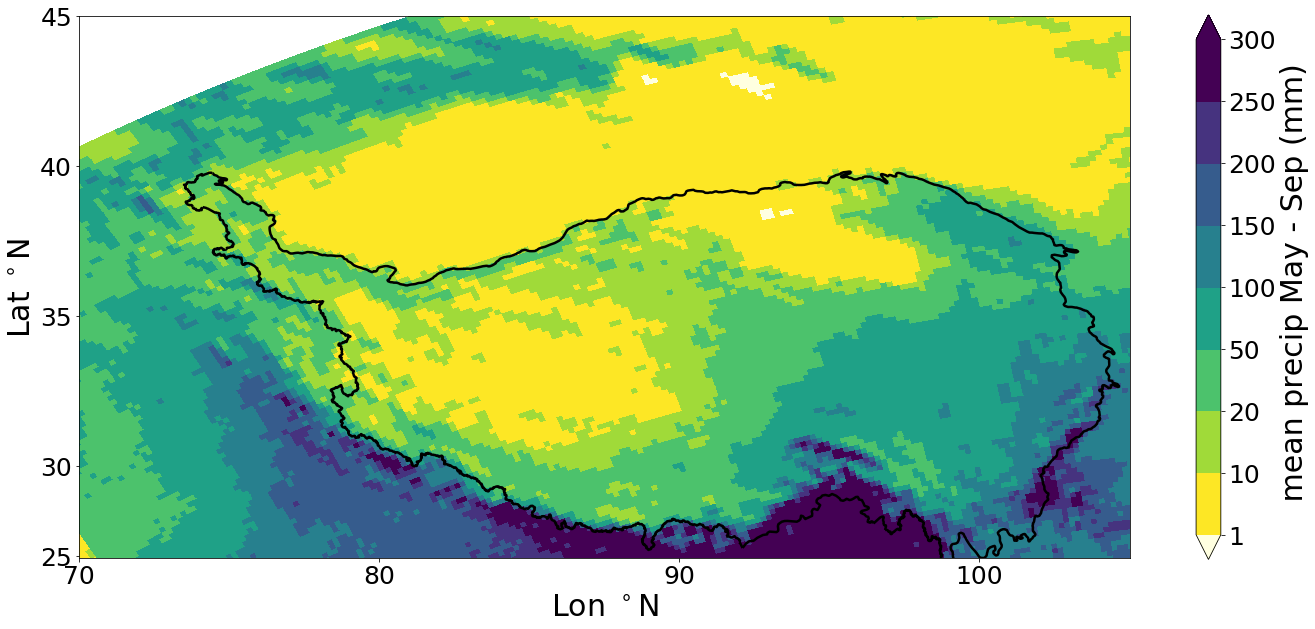

In [145]:
from cartopy import config
import cartopy.crs as ccrs


# set up a map
plt.figure(figsize=(20, 9))
#plt.pcolormesh(lons,lats,prcp)


cmap = plt.cm.get_cmap('viridis_r')
bounds= np.array([0.1, 1 , 2, 3, 5, 7, 10, 20])
bounds= np.array([1, 10, 20, 50, 100, 150, 200, 250, 300])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=26.95,urcrnrlat=44.95, llcrnrlon=70.05, urcrnrlon=105.05,  resolution = 'c')

xi,yi = m(lons,lats)
cs = m.pcolormesh(xi,yi, prcp, cmap=cmap, norm = norm, vmin= 1, vmax = 300 )
cmap.set_under(color='lightyellow')

xlabels=[70, 80, 90, 100]
ylabels= [ 25, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


cbar = plt.colorbar(extend= 'both')
cbar.set_label(' mean precip May - Sep (mm)', fontsize= 30)
cbar.set_ticks(bounds)
labels = ['0.1', '1', '2', '3', '5', '7', '10', '20']
labels= ['1', '10', '20', '50', '100', '150', '200', '250', '300']
cbar.set_ticklabels(labels)

plt.rcParams.update({'font.size': 25})
plt.tight_layout()


plt.savefig('/media/juli/Elements/comparison/cnrr_summermeanvalues_2006_2016.png')

In [136]:
f = '/media/juli/Data/third_pole/satellite_data/gpm_v06/summermean_20062016_total.nc4'
ds = Dataset(f)
prcp = np.array(ds['precipitationCal'])[0]
lats = np.array(ds['lat'])
lons = np.array(ds['lon'])

#prcp = prcp* 153


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


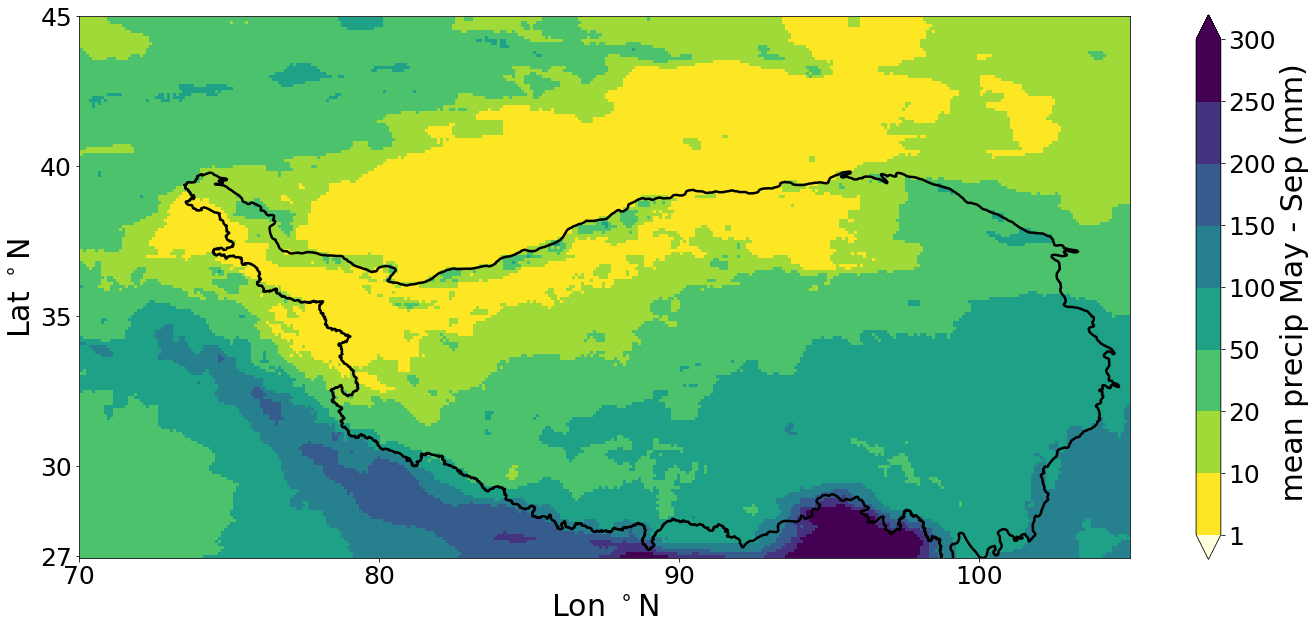

In [141]:

plt.figure(figsize=(20, 9))

cmap = plt.cm.get_cmap('viridis_r')
bounds= np.array([0.1, 1 , 2, 3, 5, 7, 10, 20])
bounds= np.array([1, 10, 20, 50, 100, 150, 200, 250, 300])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=26.95,urcrnrlat=44.95, llcrnrlon=70.05, urcrnrlon=105.05,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, prcp.T*0.5, cmap=cmap, norm = norm, vmin= 1, vmax = 300 )
cmap.set_under(color='lightyellow')

xlabels=[70, 80, 90, 100]
ylabels= [ 27, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


cbar = plt.colorbar(extend= 'both')
cbar.set_label(' mean precip May - Sep (mm)', fontsize= 30)
cbar.set_ticks(bounds)
labels = ['0.1', '1', '2', '3', '5', '7', '10', '20']
labels= ['1', '10', '20', '50', '100', '150', '200', '250', '300']
cbar.set_ticklabels(labels)

plt.rcParams.update({'font.size': 25})
plt.tight_layout()


plt.savefig('/media/juli/Elements/comparison/gpm_summermeanvalues_2006_2016.png')

#  Stats trajectory cells 

In [17]:
gpm= '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/track_statistics_gpm.h5'
gpm_cells= pd.read_hdf(gpm, 'table')
cnrr= '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/track_statistics_cnrr.h5'
cnrr_cells= pd.read_hdf(cnrr, 'table')

In [235]:
#cnrr_cells.sort_values(by = 'lifetime', ascending = False )

In [5]:
plotdir = '/media/juli/Data/third_pole/mcs_tracking/tobac_plots'

In [267]:
sort = gpm_cells.sort_values(by = 'lifetime', ascending = False)
longest =sort.iloc[0:1000,:]
cells_selected = longest.id.values 

In [268]:
# choose only cells which belong to the longest 100 
df= pd.DataFrame(columns= Tracks_gpm.columns)
for i in cells_selected:
    df = df.append(Tracks_gpm[Tracks_gpm.cell == i])
    

In [63]:
np.mean(gpm_cells.v.values)
np.mean(cnrr_cells.v.values)

5.120826580762694

In [226]:
# intensity 
gpm = gpm_cells.max_rr.values/ gpm_cells.mean_area.values
i = cnrr_cells.max_rr.values/ cnrr_cells.mean_area.values
gpm_cells['intensity'] = gpm 
hist, edges_gpm= np.histogram(gpm , bins = 50, normed = True, range = (i.min(), i.max()))
cnrr_cells['intensity'] = i
hist_cnrr, edges_cnrr= np.histogram(i, bins = 50, density = True )

In [236]:
gpm = gpm_cells.lifetime.values
i = cnrr_cells.lifetime.values
hist, edges_gpm= np.histogram(gpm, bins = 50, normed = True, range = (i.min(), i.max()))
hist_cnrr, edges_cnrr= np.histogram(i, bins = 50, density = True)

## histograms of intensity 


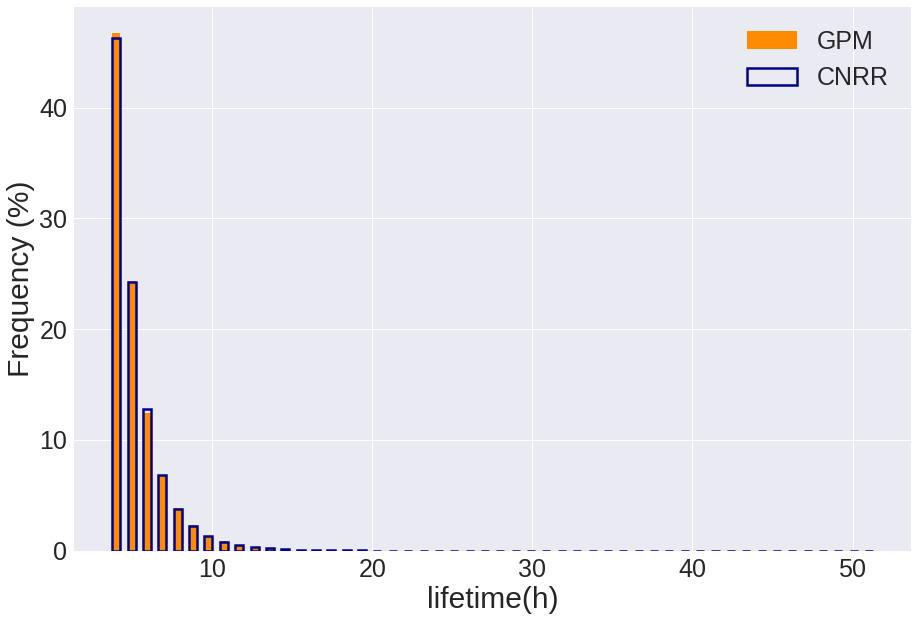

In [239]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = edges_gpm[:-1]
plt.bar(xaxis, hist/np.nansum(hist)*100, width=0.5, color='darkorange', label= 'GPM')
plt.bar(xaxis, hist_cnrr/np.nansum(hist_cnrr)*100, width=0.5, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR' )


ax_lifetime.set_xlabel('lifetime(h)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 25)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/gpm_cnrr_lifetime.png')

# What are the different characteristics of precipitation features in the two datasets? 

- distributions of mean/max rain rates as well as intensity (normalized by duration or speed), reveal that the peak in the GPM data clearly moves towards the lower values, so: CNRR has more extreme precip values
- CNRR has lower speeds and therefore also a higher environmental impact 

## histograms of mean equivalent radius 

In [20]:

gpm = np.sqrt(gpm_cells.mean_area.values/ np.pi)
gpm_cells['eq_rad'] = gpm
eq_rad = np.sqrt(cnrr_cells.mean_area.values/ np.pi)
cnrr_cells['eq_rad'] = eq_rad

In [232]:

i  =cnrr_cells.eq_rad.values
gpm= gpm_cells.eq_rad.values
hist, edges= np.histogram(gpm, bins = 50, normed = True, range = (i.min(), i.max()))


In [233]:

hist_cnrr, edges= np.histogram(eq_rad, bins = 50, normed = True)


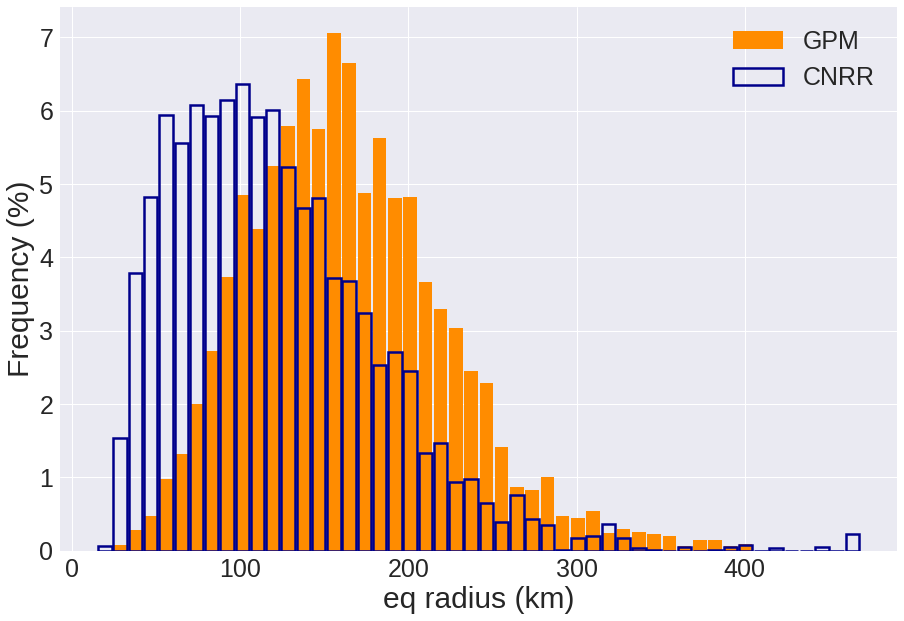

In [235]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = edges[:-1]
plt.bar(xaxis, hist/np.sum(hist)*100, width=8, color='darkorange', label= 'GPM')
plt.bar(xaxis, hist_cnrr/np.sum(hist_cnrr)*100, width=8, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR' )


ax_lifetime.set_xlabel('eq radius (km)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 25)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/histogram_eq_radius_gpm_cnrr.png')

## size and time of features? 

- CNRR features are generally smaller in size and shorter in lifetime (for the most part, but more extreme values ), in addition to the shorter lifetime the tracking showed that the tracked features contribute less to the total precipitation 

#  Function to select features with heaviest impact 

##  Preselection 

In [64]:
gpm_cells['intensity']= gpm_cells.total_precip.values/ gpm_cells.v.values

In [99]:
def heavy_impact(cells):
    s1= cells[cells['features>5mm'] > 5] # 5mm/hr threshold feature in min 6 timesteps
    s2 = s1[s1.eq_rad >= 100 ] # mean equivalent radius > 100 km 
    # select only systems within or crossing the TP 
    # sort values 
    df = s2.sort_values(by = ['total_precip'], ascending= False)
    return df

In [101]:
cells_selected = heavy_impact(gpm_cells)

In [102]:
cells_selected.shape

(12871, 13)

(0, 14)

(12871, 13)

- first selection of potential mcs candidates 
- at least one feature > 5 
- at least one feature, eq radius is > 100 km 
- choose only storms within or crossing the TP boundary 


- then sort after precip, max rain rate, intensity 

In [10]:
#intensity = gpm_cells.max_rr.values/gpm_cells.max 

- concentrate on events within TP 3000 boundary!! 
- visualization of heavy impact: with NCEP and/or DPR ! 


# Function to compare system to CNRR 

##  test code....

In [191]:
tracks = Tracks[Tracks.cell == i]
maturity= track[track.area == np.max(tracks.area.values)].timestr.values[0]
tracked_features_cnrr = Tracks_cnrr[Tracks_cnrr.timestr.values == maturity]
center_lon= tracks[tracks.area == np.max(tracks.area.values)].longitude.values[0]
center_lat = tracks[tracks.area == np.max(tracks.area.values)].latitude.values[0]

In [204]:
lon1= tracks[tracks.area == np.max(tracks.area.values)].longitude.values[0] - 3
lat1 = tracks[tracks.area == np.max(tracks.area.values)].latitude.values[0] - 3 
lon2= tracks[tracks.area == np.max(tracks.area.values)].longitude.values[0] + 3
lat2 = tracks[tracks.area == np.max(tracks.area.values)].latitude.values[0] + 3


In [203]:
print(center_lon, center_lat)

82.9901090266952 27.75413026365954


In [205]:
for idx, lon in enumerate(tracked_features_cnrr.longitude.values):
    if lon > lon1 and lon < lon2:
        lat = tracked_features_cnrr.latitude.values[idx]
        if lat > lat1 and lat < lat2:
            print('yes might be the same system!')

In [ ]:
# subselect dataframe 

In [250]:
Tracks_cnrr.shape

(337409, 20)

In [263]:
times = np.unique(Tracks_cnrr.timestr.values)
idx = np.where(times == maturity)[0][0]

In [274]:
Tracks_cnrr[Tracks_cnrr.timestr.values == maturity]
times = np.unique(Tracks_cnrr.timestr.values)
idx = np.where(times == maturity)[0][0]

start_date = times[idx - 1]
end_date = times[idx + 1]
mask = (Tracks_cnrr['timestr'] >= start_date) & (Tracks_cnrr['timestr'] <= end_date)
tracked_features_cnrr = Tracks_cnrr.loc[mask]
                                  

In [ ]:
for i in cells_selected.id.values:
    tracks = Tracks[Track.cell == i]
    # extract information about system 
    maturity= tracks[tracks.area == np.max(tracks.area.values)].timestr.values[0]
    # get rounded time value, if it is 30 min hour ! 
    center_lon= tracks[tracks.area == np.max(tracks.area.values)].longitude.values[0]
    center_lat = tracks[tracks.area == np.max(tracks.area.values)].latitude.values[0]
    lon1= tracks[tracks.area == center_lon - 1
    lat1 = tracks[tracks.area == center_lon - 1 
    lon2= tracks[tracks.area == center_lat + 1
    lat2 = tracks[tracks.area == center_lat + 1 
    
    # apply time mask to select rows in dataframe for one timestep 
    Tracks_cnrr[Tracks_cnrr.timestr.values == maturity]
    times = np.unique(Tracks_cnrr.timestr.values)
    idx = np.where(times == maturity)[0][0]
    start_date = times[idx - 1]
    end_date = times[idx + 1]
    mask = (Tracks_cnrr['timestr'] >= start_date) & (Tracks_cnrr['timestr'] <= end_date)
    tracked_features_cnrr = Tracks_cnrr.loc[mask]          
                                  
    # look at maturity time point whether tracked features are available within acceptable boundary                 
    for idx, lon in enumerate(tracked_features_cnrr.longitude.values):
        if lon > lon1 and lon < lon2:
            lat = tracked_features_cnrr.latitude.values[idx]
            if lat > lat1 and lat < lat2:
                      print('here might be a similar system ')
                  
        else:
                  print('not same system ')
                
        
    
    
    

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


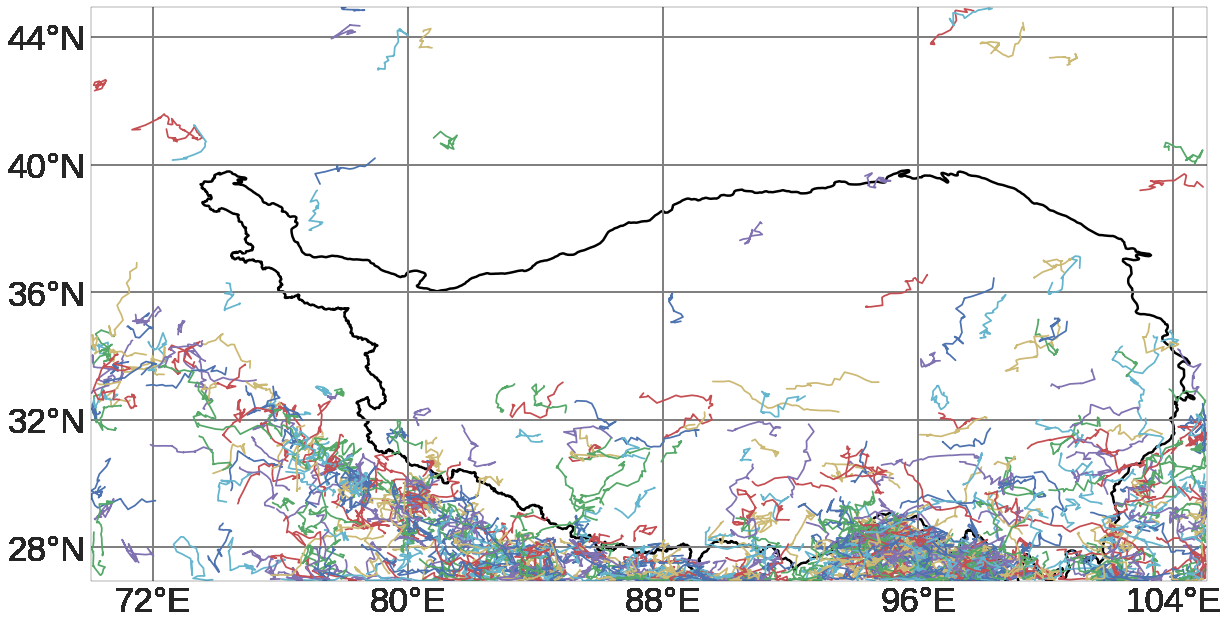

In [269]:
# Set extent of maps created in the following cells:
axis_extent=[70,105,25,45] 



# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(df,axis_extent=axis_extent,axes=ax_map)



# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


plt.rcParams.update({'font.size': 35})
plt.tight_layout()

plt.savefig(plotdir+ '/tracks_gpm_2006_2016_longest1000.png')